### File information

File: Exercise_3.2_Charts.ipynb

Name: Amie Davis

Date: 10/4/2020

Course: DSC640 - Data Presentation & Visualization

Assignment Number: 3.2

Purpose: Build treemap, area chart, and stacked area chart

Usage: Python 3.7.6

Developed using Jupter Notebook 6.0.3


References: https://matplotlib.org/

## Import required packages

In [1]:
# Install a conda package in the current Jupyter kernel
# conda install -c conda-forge squarify 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify    #treemap

# Load Data

In [3]:
# Load Expenditure data into dataframe
exp_data = "ex3-3/expenditures.txt" 
exp_df = pd.read_csv(exp_data, sep="\t")

# Show data
exp_df.head()

,year,category,expenditure,sex
0,2008,Food,6443,1
1,2008,Alcoholic Beverages,444,1
2,2008,Housing,17109,1
3,2008,Apparel,1801,1
4,2008,Transportation,8604,1


In [4]:
# Load Unemployment data into dataframe
emp_data = "ex3-3/unemployement-rate-1948-2010.csv"
emp_df = pd.read_csv(emp_data)

# Show data
emp_df.head()

,Series id,Year,Period,Value
0,LNS14000000,1948,M01,3.4
1,LNS14000000,1948,M02,3.8
2,LNS14000000,1948,M03,4.0
3,LNS14000000,1948,M04,3.9
4,LNS14000000,1948,M05,3.5


## Tree Map

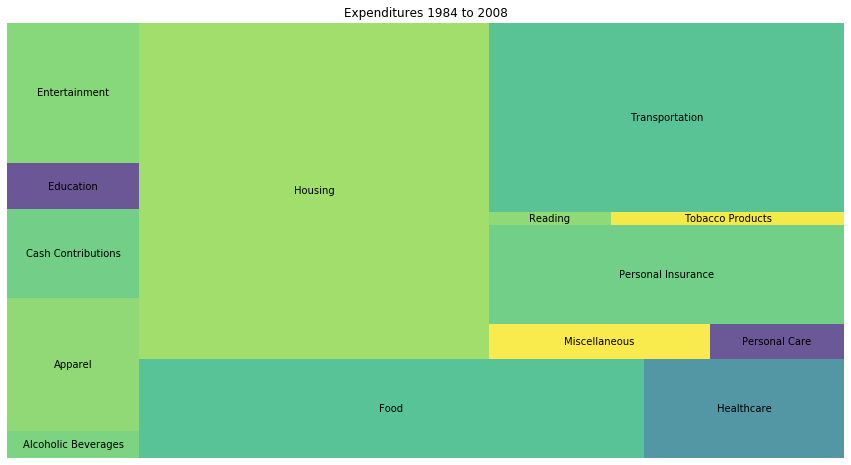

In [5]:
# Summarize expenditures for all years

# Create new df w/ totals for each category
grouper = exp_df.groupby([pd.Grouper('category')])
new_exp_df = grouper['expenditure'].sum().to_frame(name = 'cat_sum').reset_index()
#new_exp_df.head(15)

# Set size
fig, ax = plt.subplots(figsize=(15, 8))

# Show Treemap
squarify.plot(sizes=new_exp_df.cat_sum, label=new_exp_df.category, alpha=.8 )
plt.axis('off')
plt.title("Expenditures 1984 to 2008")

# Save plot to file
plt.savefig('Py_treemap.png', bbox_inches='tight')

# Show Plot
plt.show()

## Area Chart

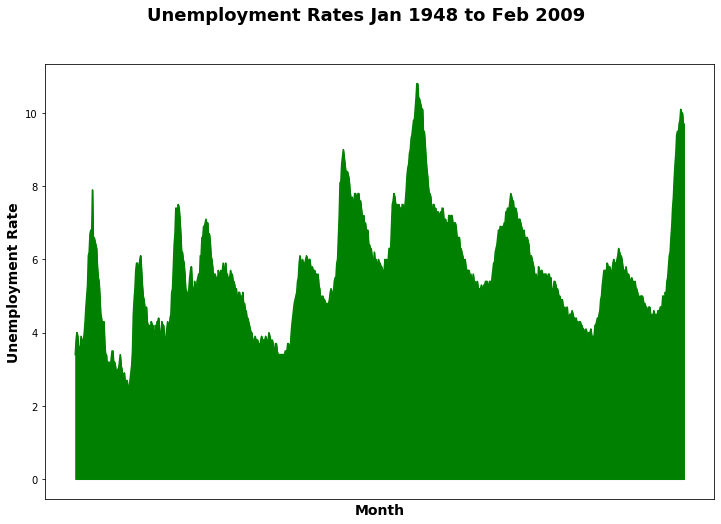

In [6]:
# Set figure and axes
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
fig.suptitle('Unemployment Rates Jan 1948 to Feb 2009 ', fontsize=18, fontweight='bold')

# Combime Year and Period columns to track by month
emp_df['Year'] = emp_df['Year'].astype(str)
emp_df["Yr_Mon"] = emp_df["Year"] + emp_df["Period"]

# Area Chart
ax.plot(emp_df.Yr_Mon,emp_df.Value,color='g')
ax.fill_between(emp_df.Yr_Mon,emp_df.Value,0,color='g')

# Set plot parameters
ax.set_xlabel('Month', fontsize=14, fontweight='bold')
ax.set_ylabel('Unemployment Rate', fontsize=14, fontweight='bold')

# Remove tick labels on x-axis
labels = [item.get_text() for item in ax.get_xticklabels()]
empty_string_labels = ['']*len(labels)
ax.set_xticklabels(empty_string_labels)
ax.set_xticks([]) 

# Save plot to file
plt.savefig('Py_area_chart.png', bbox_inches='tight')

# Show Plot
plt.show()

## Stacked Area Chart

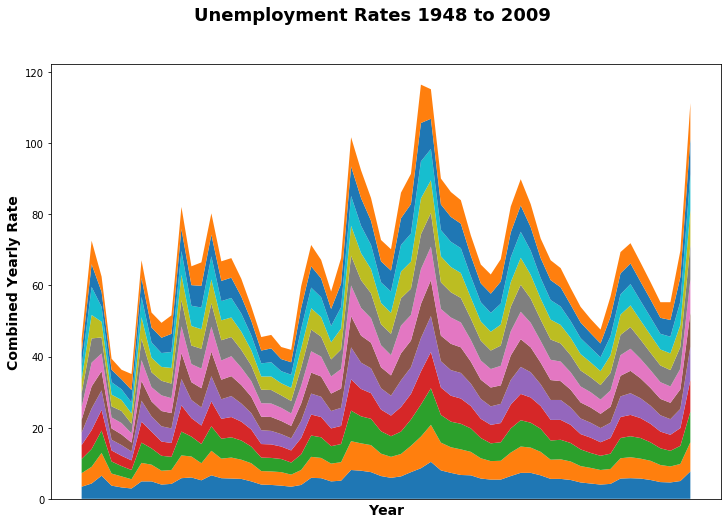

In [7]:
# Set figure and axes
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
fig.suptitle('Unemployment Rates 1948 to 2009 ', fontsize=18, fontweight='bold')

# Prepare data
isn_2010 = emp_df['Year']!='2010'
is_M01 =  emp_df['Period']=='M01'
is_M02 =  emp_df['Period']=='M02'
is_M03 =  emp_df['Period']=='M03'
is_M04 =  emp_df['Period']=='M04'
is_M05 =  emp_df['Period']=='M05'
is_M06 =  emp_df['Period']=='M06'
is_M07 =  emp_df['Period']=='M07'
is_M08 =  emp_df['Period']=='M08'
is_M09 =  emp_df['Period']=='M09'
is_M10 =  emp_df['Period']=='M10'
is_M11 =  emp_df['Period']=='M11'
is_M12 =  emp_df['Period']=='M12'

M01 = emp_df[is_M01 & isn_2010]
M02 = emp_df[is_M02 & isn_2010]
M03 = emp_df[is_M03]
M04 = emp_df[is_M04]
M05 = emp_df[is_M05]
M06 = emp_df[is_M06]
M07 = emp_df[is_M07]
M08 = emp_df[is_M08]
M09 = emp_df[is_M09]
M10 = emp_df[is_M10]
M11 = emp_df[is_M11]
M12 = emp_df[is_M12]

# Stacked Area Chart
plt.stackplot(M01.Year,M01.Value, M02.Value, M03.Value, M04.Value, M05.Value, M06.Value,
             M07.Value, M08.Value, M09.Value, M10.Value, M11.Value, M12.Value)
#ax.plot(emp_df.Yr_Mon,emp_df.Value,color='g')
#emp_df.plot.area()
#plt.stackplot(emp_df.Year,emp_df.Value, labels=emp_df.Period)
#plt.legend(loc='upper right')

# Set plot parameters
ax.set_xlabel('Year', fontsize=14, fontweight='bold')
ax.set_ylabel('Combined Yearly Rate', fontsize=14, fontweight='bold')

# Remove tick labels on x-axis
labels = [item.get_text() for item in ax.get_xticklabels()]
empty_string_labels = ['']*len(labels)
ax.set_xticklabels(empty_string_labels)
ax.set_xticks([]) 

# Save plot to file
plt.savefig('Py_stacked_area.png', bbox_inches='tight')

# Show Plot
plt.show()